In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prepare_yerevan_data import prepare_yerevan_data_pm_2_5
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [2]:
# In this file we're training a model to predict the pm2.5 level only
air_data = prepare_yerevan_data_pm_2_5()

In [3]:
corr_matrix = air_data.corr()
print(corr_matrix["pm2_5_delta"].sort_values(ascending=False))

pm2_5_delta               1.000000
is_busy                   0.283718
surface_pressure          0.031864
temperature_2m            0.017811
wind_speed_10m            0.008254
wind_speed_lag_1h        -0.000144
pm2_5_lag_1d             -0.000490
precipitation            -0.010716
relative_humidity_2m     -0.012006
wind_speed_lag_2h        -0.012628
stagnation               -0.012995
wind_speed_lag_3h        -0.045814
hour_sin                 -0.087600
pm2_5_lag_1h             -0.100630
pm2_5_rolling_12h_mean   -0.151383
hour_cos                 -0.154515
pm2_5_rolling_6h_std     -0.160930
pm2_5_lag_2h             -0.184776
pm2_5_rolling_6h_mean    -0.196198
pm2_5_lag_3h             -0.223436
Name: pm2_5_delta, dtype: float64


In [4]:
# Spltting into training and testing

X = air_data.drop(columns=['pm2_5_delta'])
y = air_data['pm2_5_delta']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=False)


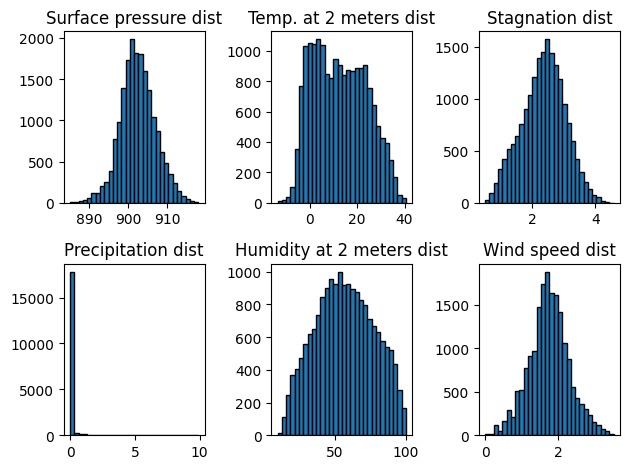

In [5]:

fig, axs = plt.subplots(2, 3)

axs[0, 0].hist(air_data['surface_pressure'], bins=30, edgecolor='k')
axs[0, 0].set_title("Surface pressure dist")
axs[0, 1].hist(air_data['temperature_2m'], bins=30, edgecolor='k')
axs[0, 1].set_title("Temp. at 2 meters dist")
axs[0, 2].hist(air_data['stagnation'], bins=30, edgecolor='k')
axs[0, 2].set_title("Stagnation dist")
axs[1, 0].hist(air_data['precipitation'], bins=30, edgecolor='k')
axs[1, 0].set_title("Precipitation dist")
axs[1, 1].hist(air_data['relative_humidity_2m'], bins=30, edgecolor='k')
axs[1, 1].set_title("Humidity at 2 meters dist")
axs[1, 2].hist(air_data['wind_speed_10m'], bins=30, edgecolor='k')
axs[1, 2].set_title("Wind speed dist")

plt.tight_layout()
plt.show()

(array([2.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00,
        2.3000e+01, 7.5000e+01, 2.6400e+02, 8.9200e+02, 2.8860e+03,
        1.0464e+04, 2.8720e+03, 6.7000e+02, 2.2900e+02, 9.7000e+01,
        3.7000e+01, 1.9000e+01, 8.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([-11.2 , -10.13,  -9.06,  -7.99,  -6.92,  -5.85,  -4.78,  -3.71,
         -2.64,  -1.57,  -0.5 ,   0.57,   1.64,   2.71,   3.78,   4.85,
          5.92,   6.99,   8.06,   9.13,  10.2 ]),
 <BarContainer object of 20 artists>)

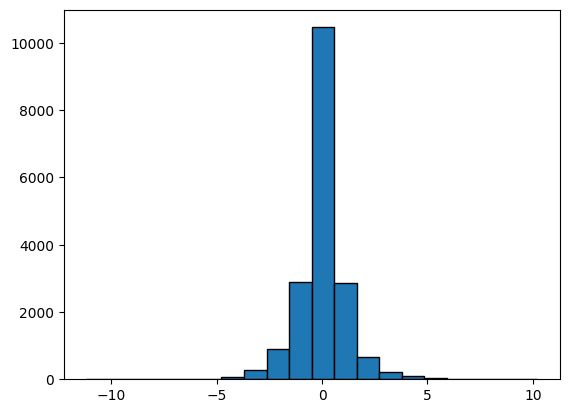

In [6]:
plt.hist(y, bins=20, edgecolor='k')

In [7]:
# std_scaler = StandardScaler()
# X_train_scaled = std_scaler.fit_transform(X_train)
# X_test_scaled = std_scaler.transform(X_test)

In [8]:
# Selecting a model and fitting (hyperparams are tuned by performing grid search)
model = XGBRegressor(
    random_state=42,
    gamma=0.1,
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=5,
)

In [9]:
# param_grid = {
#     "n_estimators" : [1000, 1250, 1500],
#     "max_depth" : [3, 5, 7],
#     "gamma" : [0.05, 0.1, 0.15, 0.2],
#     "learning_rate" : [0.01, 0.02, 0.03]
# }

In [10]:
# tscv = TimeSeriesSplit(n_splits=3)

In [11]:
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     verbose=4,
#     cv=tscv,
#     scoring="neg_root_mean_squared_error",
#     refit=True
# )

In [12]:
# grid_search.fit(X_train, y_train)

In [13]:
# grid_search.best_score_

In [14]:
# Fit the model
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [15]:
# Predicting
y_pred = model.predict(X_test)

In [16]:
# Evaluating
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.3f}")
print(f"R^2: {r2_score(y_test, y_pred):.3f}")


MAE: 0.749
RMSE: 1.108
R^2: 0.404


In [17]:
# Feature importances for our model
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                   Feature  Importance
5                  is_busy    0.382230
8             pm2_5_lag_3h    0.096664
0           temperature_2m    0.081766
11                hour_cos    0.056938
10                hour_sin    0.054139
7             pm2_5_lag_2h    0.032022
17    pm2_5_rolling_6h_std    0.030744
16   pm2_5_rolling_6h_mean    0.030360
6             pm2_5_lag_1h    0.029938
9             pm2_5_lag_1d    0.029592
18  pm2_5_rolling_12h_mean    0.028696
15       wind_speed_lag_3h    0.024706
13       wind_speed_lag_1h    0.021518
4         surface_pressure    0.019485
14       wind_speed_lag_2h    0.018453
12              stagnation    0.016745
1           wind_speed_10m    0.015689
2     relative_humidity_2m    0.015641
3            precipitation    0.014673


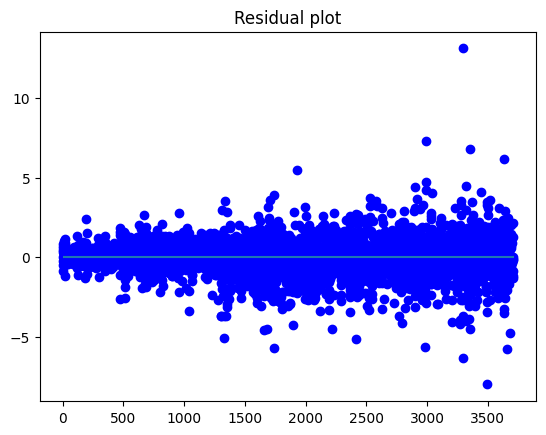

In [18]:
plt.title("Residual plot")
plt.hlines(xmin=0, xmax=len(y_pred), y=0)
plt.scatter(np.arange(len(y_pred)), y_pred - y_test, color='blue')